# Common Time Series Analysis
This notebook is meant to be a simple example of performing some common time series analysis. Given a dataset of observations over time, we'll plot one variable daily, determine it's trend, and +/- std deviations over a rolling window.

To use this in your own analysis, you'll obviously need a CSV data file with your own observations.  

In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

## Reading Input Data
This open dataset provided by Data World (https://data.world/data-society/airlines-delay/workspace/file?filename=airlinedelaycauses%2FDelayedFlights.csv) provides some detailed data for just over 450k flights in January, 2017. 

In [16]:
# input_filepath = 'c:/users/rbagley/downloads/On_Time_On_Time_Performance_2017_1.csv'
# dataset = pd.read_csv(input_filepath, header=0, 
#         usecols=[
#             'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek', 'FlightDate',
#             'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'DepDelay', 'ArrDelay', 
#         ]
#     )

In [17]:
dataset = pd.read_csv("C:/Users/jacob.carey/Desktop/DataSets/AirlineDelays/DelayedFlights.csv", header=0,
                             usecols=['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'TailNum', 'Origin', 'Dest', 'DepDelay', 'ArrDelay'])

## Data Cleanup
Let's reduce the data to a single measure ('ArrDelay') and average by day of month

In [18]:
delays = dataset[['DayofMonth', 'ArrDelay']].groupby(['DayofMonth']).mean()

In [19]:
delays.head()

,ArrDelay
DayofMonth,
1,42.256426
2,41.090116
3,38.519055
4,49.014441
5,39.150905


## Basic Visualization
Let's see if we can get an idea of what this average daily delay looks like.

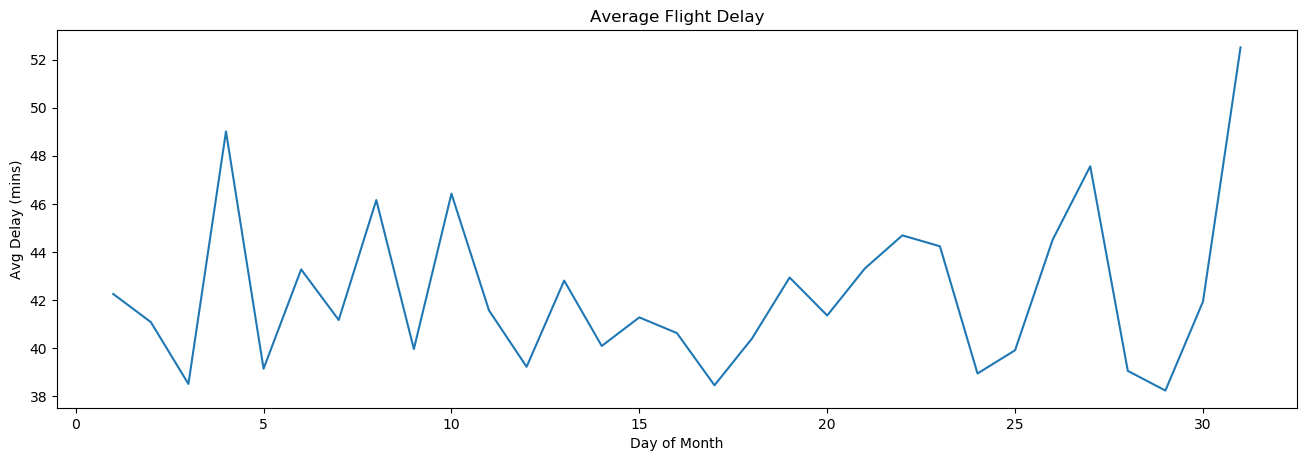

In [20]:
# simple plot of the delays by day
plt.figure(figsize=(16,5), dpi=100)
plt.plot(consent.index, consent['ArrDelay'], color='tab:blue')
plt.gca().set(title='Average Flight Delay', xlabel='Day of Month', ylabel='Avg Delay (mins)')
plt.show()


Nice to have the graphic, but boring. And it hides the fact that some days averaged *early* arrivals.

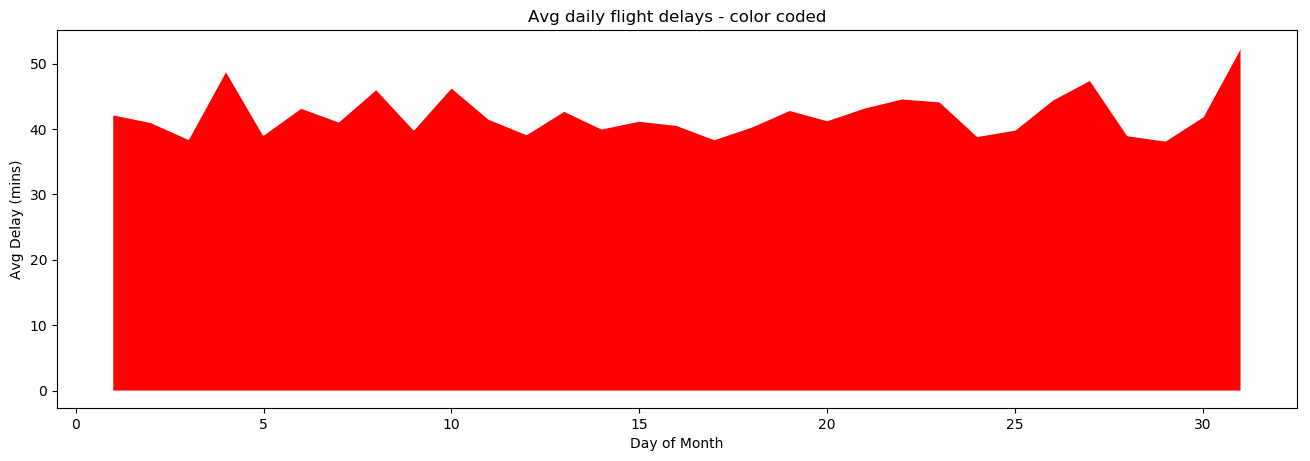

In [21]:
# pretty it up a bit as an area chart with green and red
plt.figure(figsize=(16,5), dpi=100)
plt.plot(delays.index, delays['ArrDelay'], color='white')
plt.fill_between(delays.index, y1=delays['ArrDelay'], y2=0, where=delays['ArrDelay']>=0, facecolor='red', interpolate=True)
plt.fill_between(delays.index, y1=delays['ArrDelay'], y2=0, where=delays['ArrDelay']<=0, facecolor='green', interpolate=True)
plt.gca().set(title='Avg daily flight delays - color coded', xlabel='Day of Month', ylabel='Avg Delay (mins)')
plt.show()


This is much prettier. And the color coding helps to call out true delays from flights that are ahead of schedule.

## Some Analysis
Let's add a trendline and see what the data suggests about the future.

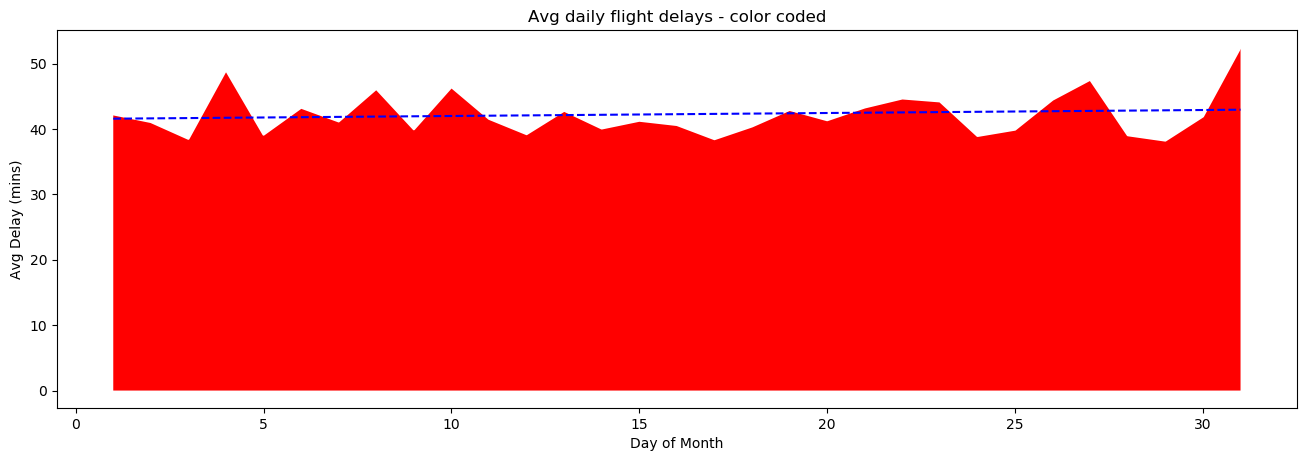

In [22]:
# numpy can fit the curve, convert to a polynomial, and then we add to the graph
trend_array = np.polyfit(delays.index, delays['ArrDelay'], 1)
trend_poly = np.poly1d(trend_array)

plt.figure(figsize=(16,5), dpi=100)
plt.plot(delays.index, delays['ArrDelay'], color='white')
plt.fill_between(delays.index, y1=delays['ArrDelay'], y2=0, where=delays['ArrDelay']>=0, facecolor='red', interpolate=True)
plt.fill_between(delays.index, y1=delays['ArrDelay'], y2=0, where=delays['ArrDelay']<=0, facecolor='green', interpolate=True)
plt.plot(delays.index, trend_poly(delays.index), 'b--')
plt.gca().set(title='Avg daily flight delays - color coded', xlabel='Day of Month', ylabel='Avg Delay (mins)')
plt.show()

Interesting that the trend line is dropping. It's informative... and implies that delays are disappearing over time. Maybe not really the case? Certainly seems counter-intuitive.

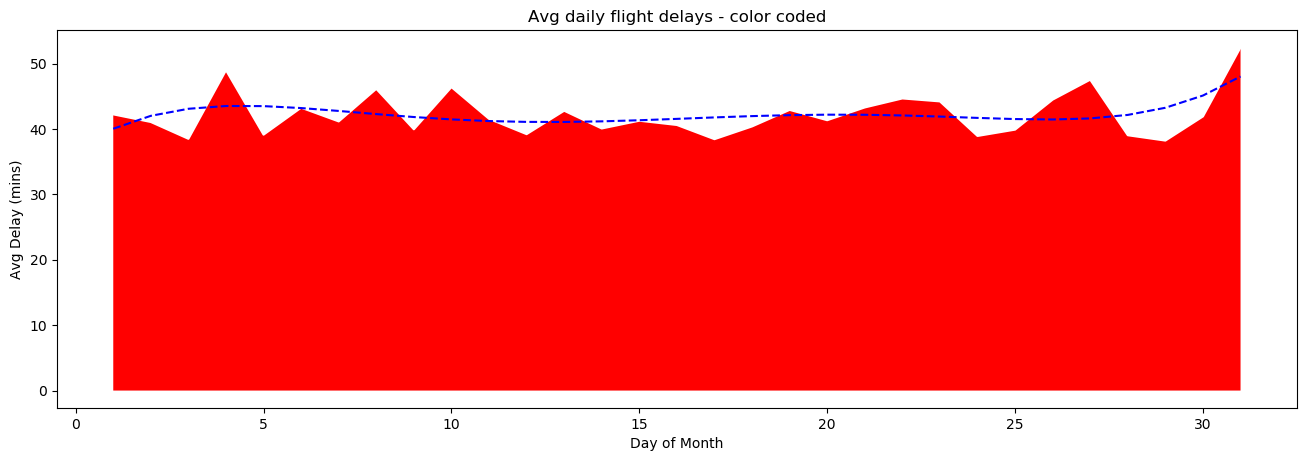

In [23]:
# Can change 3rd parameter in numpy.polyfit() to make higher-order trend lines
trend_order = 5
trend_array = np.polyfit(delays.index, delays['ArrDelay'], trend_order)
trend_poly = np.poly1d(trend_array)

plt.figure(figsize=(16,5), dpi=100)
plt.plot(delays.index, delays['ArrDelay'], color='white')
plt.fill_between(delays.index, y1=delays['ArrDelay'], y2=0, where=delays['ArrDelay']>=0, facecolor='red', interpolate=True)
plt.fill_between(delays.index, y1=delays['ArrDelay'], y2=0, where=delays['ArrDelay']<=0, facecolor='green', interpolate=True)
plt.plot(delays.index, trend_poly(delays.index), 'b--')
plt.gca().set(title='Avg daily flight delays - color coded', xlabel='Day of Month', ylabel='Avg Delay (mins)')
plt.show()

This makes much more sense. Certainly some days are better or worse than others, but that string of early days may just be temporary. Try playing with the 'trend_order' variable in the prior code block and see how it affects the graph.

A full forecasting model might tell us more. While a full forecasting model is beyond the scope of this simple exercise, we can do some elemantary forecasting.

Let's start by adding some understanding of "normal" to the graph with a rolling calculation of standard deviation.

In [24]:
# Calculate rolling std deviation (sigma) and add columns for +/- sigma
window_size = 7  # calculate std dev over the most recent window of this many days
delays['sigma'] = delays['ArrDelay'].rolling(window_size).std()
delays['-1sigma'] = delays['ArrDelay'] - delays['sigma']
delays['+1sigma'] = delays['ArrDelay'] + delays['sigma']
delays.tail()

,ArrDelay,sigma,-1sigma,+1sigma
DayofMonth,,,,
27,47.565052,2.966566,44.598486,50.531617
28,39.061860,3.373970,35.687890,42.435830
29,38.244112,3.613142,34.630970,41.857254
30,41.938936,3.453600,38.485336,45.392537
31,52.506552,5.182731,47.323821,57.689283


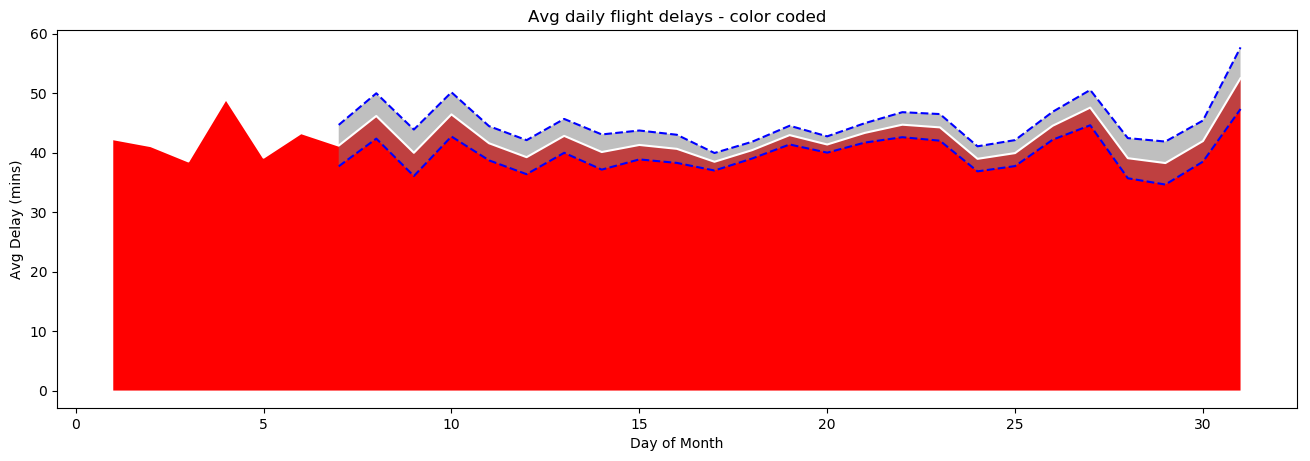

In [25]:
# now add these +/-sigma lines to the plot
plt.figure(figsize=(16,5), dpi=100)
plt.plot(delays.index, delays['ArrDelay'], color='white')
plt.fill_between(delays.index, y1=delays['ArrDelay'], y2=0, where=delays['ArrDelay']>=0, facecolor='red', interpolate=True)
plt.fill_between(delays.index, y1=delays['ArrDelay'], y2=0, where=delays['ArrDelay']<=0, facecolor='green', interpolate=True)
plt.plot(delays.index, delays['-1sigma'], 'b--')
plt.plot(delays.index, delays['+1sigma'], 'b--')
plt.fill_between(delays.index, y1=delays['-1sigma'], y2=delays['+1sigma'], facecolor='gray', alpha=0.5)
plt.gca().set(title='Avg daily flight delays - color coded', xlabel='Day of Month', ylabel='Avg Delay (mins)')
plt.show()

This shows us the delay activity, plus a range of expected variation (i.e. "standard deviation") around each point. But it doesn't really call out *surprises* for us. Let's offset the "expected" range by one day and see how the value of each day compares to the expected range from the prior several days.

In [26]:
# Once again, Calculate rolling std deviation (sigma)
window_size = 7  # calculate std dev over the most recent window of this many days
sigma_series = delays['ArrDelay'].rolling(window_size).std()  # Don't yet add this to the dataframe
# Add a new "NaN" to the front and remove the last value, effectively shifting everything down one position in the list
shifted_sigma = sigma_series.shift(periods=1)[:(sigma_series.size-1)]
# Repeate the above for delay time
delays_series = delays['ArrDelay']
shifted_delays = delays_series.shift(periods=1)[:(delays_series.size-1)]
# Add the new 'PrevSigma' and 'PrevDelay' columns to the dataframe, then the +/- sigma columns
delays['PrevSigma'] = shifted_sigma
delays['PrevDelay'] = shifted_delays
delays['Prev-1sigma'] = delays['PrevDelay'] - delays['PrevSigma']
delays['Prev+1sigma'] = delays['PrevDelay'] + delays['PrevSigma']
# In this view, note that the +/-sigma values from day 29 are copied to the corresponding 'Prev' values of day 30, 
# and same for the delay value
delays.tail()

,ArrDelay,sigma,-1sigma,+1sigma,PrevSigma,PrevDelay,Prev-1sigma,Prev+1sigma
DayofMonth,,,,,,,,
27,47.565052,2.966566,44.598486,50.531617,2.346854,44.512203,42.165349,46.859057
28,39.061860,3.373970,35.687890,42.435830,2.966566,47.565052,44.598486,50.531617
29,38.244112,3.613142,34.630970,41.857254,3.373970,39.061860,35.687890,42.435830
30,41.938936,3.453600,38.485336,45.392537,3.613142,38.244112,34.630970,41.857254
31,52.506552,5.182731,47.323821,57.689283,NaN,NaN,NaN,NaN


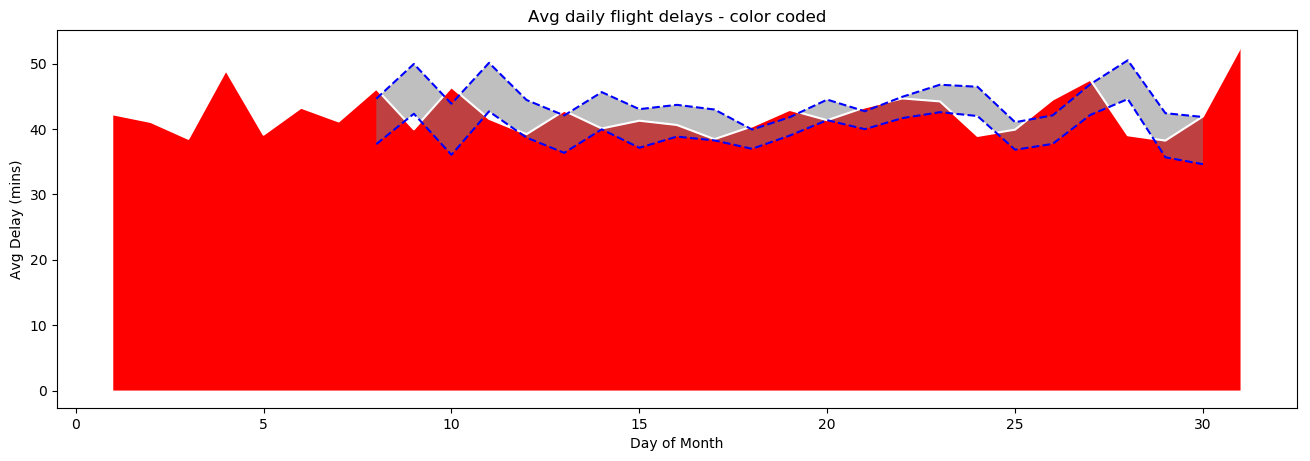

In [27]:
# Plot as before but with these new 'Prev' values in the expected band
plt.figure(figsize=(16,5), dpi=100)
plt.plot(delays.index, delays['ArrDelay'], color='white')
plt.fill_between(delays.index, y1=delays['ArrDelay'], y2=0, where=delays['ArrDelay']>=0, facecolor='red', interpolate=True)
plt.fill_between(delays.index, y1=delays['ArrDelay'], y2=0, where=delays['ArrDelay']<=0, facecolor='green', interpolate=True)
plt.plot(delays.index, delays['Prev-1sigma'], 'b--')
plt.plot(delays.index, delays['Prev+1sigma'], 'b--')
plt.fill_between(delays.index, y1=delays['Prev-1sigma'], y2=delays['Prev+1sigma'], facecolor='gray', alpha=0.5)
plt.gca().set(title='Avg daily flight delays - color coded', xlabel='Day of Month', ylabel='Avg Delay (mins)')
plt.show()

What does this tell us? The gray zone is the region of values expected *based on the prior several days*. Some days, the actual value is inside the drawn boundaries (i.e. Jan 15th) - these values are totally expected and not alarming. Other days (i.e. Jan 22nd), the actual value is way out of the bounds - this is unexpected and could be something to look into!

Also, note that the band of expected values changes size over time: Around mid-month, the band is narrow because the prior days were fairly consistent with each other. After that jump on Jan 22nd, though, the band gets wide again and raises some uncertainty in our simple forecasting model. 

Thinking back several steps... That earlier trendline suggested some form of pattern in the data. Maybe some days of week are larger delays than others? Let's pivot to 'DayOfWeek' and find out.

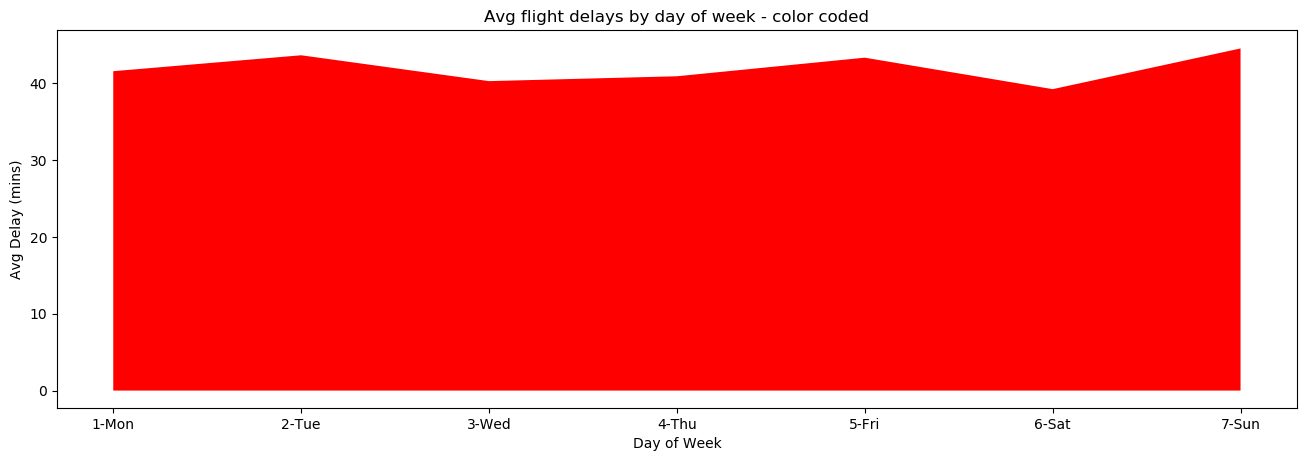

In [28]:
# Swap the X-axis to Day of Week and see what emerges
weekly_delays = dataset[['DayOfWeek','ArrDelay']].groupby(['DayOfWeek']).mean()
weekly_delays['DayLabel'] = ['1-Mon', '2-Tue', '3-Wed', '4-Thu', '5-Fri', '6-Sat', '7-Sun']

plt.figure(figsize=(16,5), dpi=100)
plt.plot(weekly_delays['DayLabel'], weekly_delays['ArrDelay'], color='white')
plt.fill_between(weekly_delays['DayLabel'], y1=weekly_delays['ArrDelay'], y2=0, where=weekly_delays['ArrDelay']>=0, facecolor='red', interpolate=True)
plt.fill_between(weekly_delays['DayLabel'], y1=weekly_delays['ArrDelay'], y2=0, where=weekly_delays['ArrDelay']<=0, facecolor='green', interpolate=True)
plt.gca().set(title='Avg flight delays by day of week - color coded', xlabel='Day of Week', ylabel='Avg Delay (mins)')
plt.show()

Definitely looks as though the day of week has an impact. Sundays and Mondays are worse than Tuesdays and Wednesdays.

## Additional Thoughts
Like with all exercises, partitioning the data to look at just one category could make for some interesting analysis. What if we were to look at only flights from Delta or American Airlines? Or, what if we examined only the flights leaving ATL (Atlanta, GA) or arriving in EWR (Newark, NJ)? With a relatively simple filter on the dataframe read from CSV, all of this analysis could be repeated to explore those hypotheses. 

&copy; Mackinac Data Group, 2019